# Descriptores de forma.   
Los descriptores de forma son técnicas que buscan representar las características geométricas de los objetos presentes en una imagen de manera cuantitativa. Es decir, transforman la información visual de la forma de un objeto en un conjunto de números (un vector) que pueden ser procesados por algoritmos de aprendizaje automático.   

**¿Para qué sirven?**
- *Reconocimiento de objetos*: Permiten comparar y clasificar objetos en imágenes, incluso si varían en tamaño, orientación o posición.
- *Recuperación de imágenes*: Se pueden utilizar para buscar imágenes similares en una base de datos, basándose en la forma de los objetos que contienen.
- *Segmentación de imágenes*: Ayudan a separar los objetos de interés del fondo de la imagen.
- *Análisis morfológico*: Proporcionan información sobre la estructura y la forma de los objetos, lo que puede ser útil en diversas aplicaciones científicas y médicas.   

## Descriptores geométricos.   
Los *descriptores geométricos* analizan la forma estructural de *objetos binarios* y sus *contornos*. Se pueden utilizar para *identificar objetos* y *reconocer patrones* en una imagen.    

Algunos ejemplos son:    
- **Área** -> Mide el número de píxeles que contiene la región de interés. 
- **Bounding box (bbox)** -> Consiste en el rectángulo más pequeño capaz de albergar la región de interés (rectángulo rojo). 
- **Área de la bbox** -> Número de píxeles que contiene la bounding box. 
- **Convex hull image** -> Consiste en el polígono convexo más pequeño capaz de albergar la región de interés (polígono cyan). 
- **Área de la convex image** -> Mide el número de píxeles dentro de la convex image. 
- **Excentricidad** -> Es la relación de la distancia entre los focos de la elipse y su longitud del eje principal. Una elipse con excentricidad=0 es un círculo, mientras que una excentricidad =1 denota un segmento de línea. 
- **Diámetro equivalente** -> Consiste en el diámetro de un círculo cuya área sea la misma que la región de interés.   
- **Extensión** -> Se define como el ratio de píxeles en la región con respecto al número total de píxeles contenidos en la bounding box. 
- **Longitud del eje mayor** -> Se refiere a la longitud del eje mayor de una elipse que tiene el mismo segundo momento central normalizado que la región. 
- **Longitud del eje menor** -> Igual para el eje menor de la elipse. 
- **Orientación** -> Es el ángulo que forma la elipse anterior con respecto al eje horizontal. El valor se expresa en grados en un rango de [-90, 90]. 
- **Perímetro** -> Se define como el número de píxeles que forman parte del contorno del objeto de interés. 
- **Solidez** -> Corresponde con la proporción de píxeles que contiene el área respecto a la convex hull image. En el caso de polígonos regulares, su valor será 1.   

A partir de estos descriptores se podrían extraer otros de interés como: 
- **Compacidad** -> Mide la circularidad del objeto. Se calcula como el cociente entre el área y el perímetro al cuadrado. 
- **Rectangularidad** -> Se define como el cociente entre el área del objeto y la bounding box.   

<img src="./img/desgeometricos.jpg" width=400>

En primer lugar, obtenemos la máscara de la imagen original mediante la umbralización con Otsu

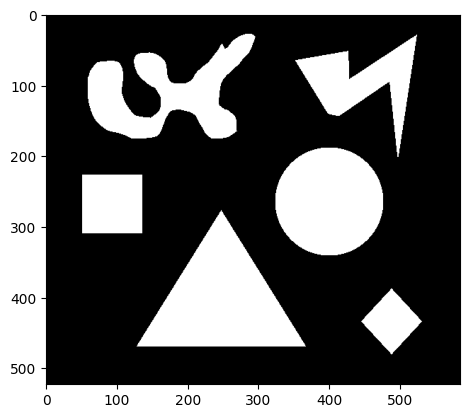

In [ ]:

import matplotlib.pyplot as plt
import cv2
import numpy as np
img = cv2.imread('img/figuras.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, mask = cv2.threshold(img_gray,0,1,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.imshow(mask, cmap='gray')
plt.show()

Convertimos la imagen binaria en una imagen de etiquetas para tener acceso a cada objeto por separado

**Importante:**
- En 'num' devuelve 6 valores correspondientes a los 6 objetos que hay en la imagen.
- Sin embargo, 'lab' contiene hasta 7 valores diferentes, ya que también tiene en cuenta el fondo de la imagen.

número de objetos:  6
posibles valores de intensidad:  [0 1 2 3 4 5 6]


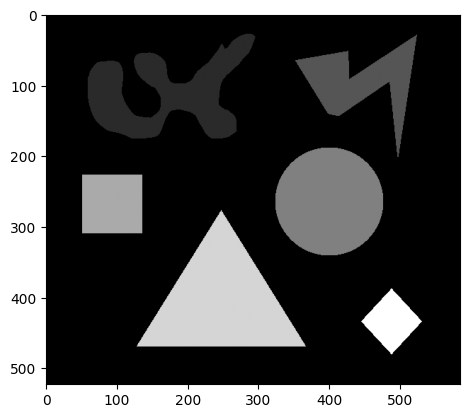

In [ ]:

from skimage.measure import label

lab, num = label(mask, return_num=True)


print('número de objetos: ', num)
v,c = np.unique(lab, return_counts=True)
print('posibles valores de intensidad: ', v)

plt.imshow(lab, cmap='gray')
plt.show()

Extracción de la **bounding box** y la **convex hull image** del objeto seleccionado
*Info*: https://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.regionprops

1. Primero seleccionamos el objeto

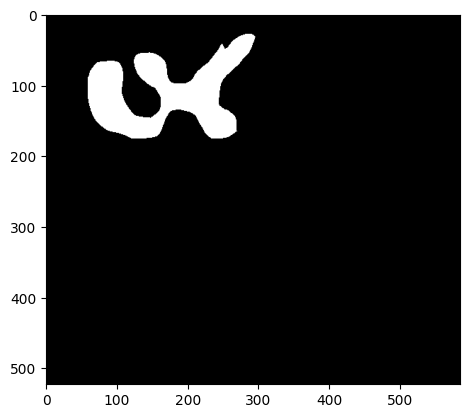

In [ ]:

from skimage.measure import regionprops

objeto = lab == 1
objeto = objeto.astype('uint8')
plt.imshow(objeto, cmap='gray')
plt.show()

2. Después, podemos extraer la **bounding box**

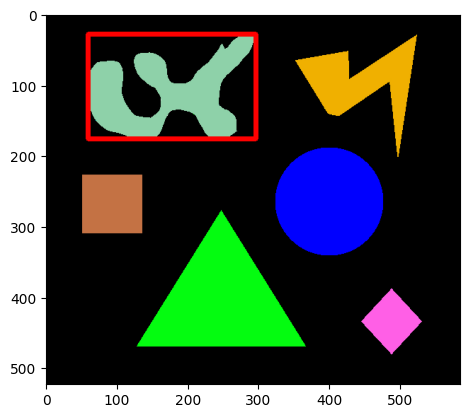

In [ ]:

prop = regionprops(objeto)
bbox = prop[0].bbox
start_point = (bbox[1], bbox[0])
end_point = (bbox[3], bbox[2])
window = cv2.rectangle(img.copy(), start_point, end_point, (255, 0, 0), 5)
                     
plt.imshow(window, cmap='gray')
plt.show()

3. Y, seguidamente, la **convex hull image**

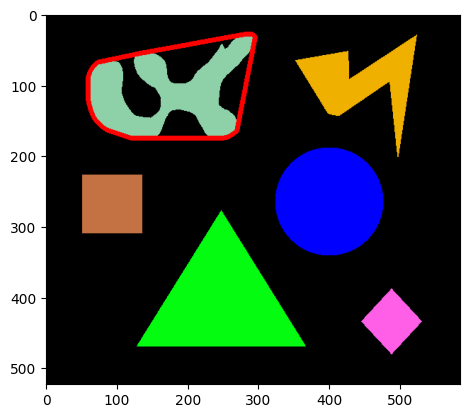

In [ ]:

from skimage.morphology import convex_hull_image

convex_image = convex_hull_image(objeto)
convex_image = convex_image.astype('uint8')
conts,_ = cv2.findContours(convex_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
imagen = cv2.drawContours(img.copy(), conts, -1, (255,0,0), 5)
                     
plt.imshow(imagen, cmap='gray')
plt.show()

4. Repetimos el proceso completo para todos los objetos de la imagen

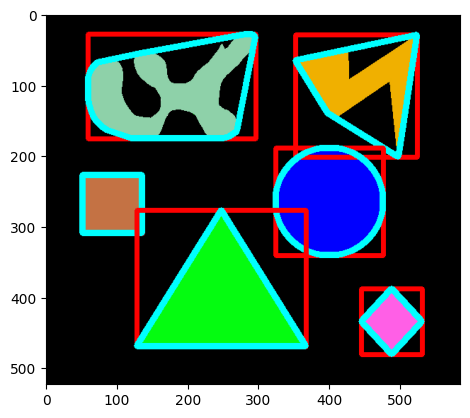

In [ ]:

imagen = img.copy()
for i in range(1, num+1): 
    objeto = lab == i
    objeto = objeto.astype('uint8')
    
    # bbox
    prop = regionprops(objeto)
    bbox = prop[0].bbox
    imagen = cv2.rectangle(imagen, (bbox[1], bbox[0]), (bbox[3], bbox[2]), (255, 0, 0), 5)
    
    # covex hull
    convex_image = convex_hull_image(objeto)
    convex_image = convex_image.astype('uint8')
    conts,_ = cv2.findContours(convex_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    imagen = cv2.drawContours(imagen, conts, -1, (0,255,255), 8)

plt.imshow(imagen, cmap='gray')
plt.show()

### Extracción de otros descriptores geométricos.   

Vamos a extraer diferentes descriptores geométricos que nos ayudarán a caracterizar los objetos.

NOTA: para presentar los datos en formato tabular usamos la libreria `tabulate`. Para su instalación:   
````
pip install tabulate
````

In [ ]:
from tabulate import tabulate
import math

new_lab, new_num = label(mask, return_num=True)

Extracción del resto de las características geométricas

In [ ]:


headers = ['','Raro', 'Rayo', 'Círculo', 'Cuadrado', 'Triángulo', 'Rombo']
A,BB,CA,E,ED,EX,MA,MiA,P,S,CO,R = ['area'], ['bbox_area'], ['convex_area'], ['Excentricidad'], ['Diámetro_eq.'], \
['Extensión'], ['Eje_mayor'], ['Eje_menor'], ['Perímetro'], ['Solidez'], ['Compacidad'], ['Rectangularidad']

for i in range(1,new_num+1):
    objeto = new_lab == i
    prop = regionprops(objeto.astype(np.uint8))
    
    A.append(np.round(prop[0].area, 4))
    BB.append(np.round(prop[0].bbox_area, 4))
    CA.append(np.round(prop[0].convex_area, 4))
    E.append(np.round(prop[0].eccentricity, 4))
    ED.append(np.round(prop[0].equivalent_diameter, 4))
    EX.append(np.round(prop[0].extent, 4))
    MA.append(np.round(prop[0].major_axis_length, 4))
    MiA.append(np.round(prop[0].minor_axis_length, 4))
    P.append(np.round(prop[0].perimeter, 4))
    S.append(np.round(prop[0].solidity, 4))
    
    CO.append(np.round(4*math.pi*prop[0].area/prop[0].perimeter**2, 4))
    R.append(np.round(prop[0].area/prop[0].bbox_area, 4))

# Preparación de los datos para la tabla
my_data = [tuple(A), tuple(BB), tuple(CA), tuple(E), tuple(ED), tuple(EX), \
          tuple(MA), tuple(MiA), tuple(P), tuple(S), tuple(CO), tuple(R)]

# Impresión de la tabla
print(tabulate(my_data, headers=headers))

                       Raro        Rayo     Círculo    Cuadrado    Triángulo      Rombo
---------------  ----------  ----------  ----------  ----------  -----------  ---------
area             16198       10282       18344        7055        23119       4018
bbox_area        35076       29756       23104        7055        46127       7998
convex_area      27405       16959       18488        7055        23307       4102
Excentricidad        0.8556      0.7941      0           0.2157       0.371      0.3866
Diámetro_eq.       143.61      114.418     152.828      94.7771     171.569     71.5254
Extensión            0.4618      0.3455      0.794       1            0.5012     0.5024
Eje_mayor          268.45      186.995     152.828      98.1428     195.774     76.1969
Eje_menor          138.975     113.644     152.828      95.8332     181.801     70.2735
Perímetro         1029.77      736.02      503.245     332          717.962    255.588
Solidez              0.5911      0.6063      0.9